In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
# ruff :noqa: E402

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Background

# Dataset

In [3]:
sns.set_style("whitegrid")
%matplotlib inline


def set_seed(seed: int = 31415) -> None:
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)


set_seed()

In [4]:
df = pd.read_csv("data/AB_US_2023.csv")

/tmp/ipykernel_16240/3866743118.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/AB_US_2023.csv")


In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

In [7]:
df.describe(include="all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
count,2.321470e+05,232131,2.321470e+05,232134,96500,232147,232147.000000,232147.000000,232147,232147.000000,232147.000000,232147.000000,183062,183062.000000,232147.000000,232147.000000,232147.000000,232147
unique,NaN,220164,NaN,29368,30,1412,NaN,NaN,4,NaN,NaN,NaN,3147,NaN,NaN,NaN,NaN,27
top,NaN,Presidential Suite In A Mansion,NaN,Blueground,City of Los Angeles,Unincorporated Areas,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2023-03-05,NaN,NaN,NaN,NaN,New York City
freq,NaN,150,NaN,4305,22204,11882,NaN,NaN,169142,NaN,NaN,NaN,5008,NaN,NaN,NaN,NaN,42931
mean,2.584580e+17,NaN,1.582248e+08,NaN,NaN,NaN,36.610585,-98.301436,NaN,259.468001,13.495867,40.915230,NaN,1.638348,29.879055,180.985686,11.689701,NaN
std,3.465985e+17,NaN,1.587164e+08,NaN,NaN,NaN,5.126523,19.706929,NaN,1024.645918,27.920631,80.649152,NaN,1.910812,106.013665,134.715299,20.599954,NaN
min,6.000000e+00,NaN,2.300000e+01,NaN,NaN,NaN,25.957323,-123.089130,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.638896e+07,NaN,2.299242e+07,NaN,NaN,NaN,33.976225,-118.315111,NaN,91.000000,2.000000,1.000000,NaN,0.310000,1.000000,52.000000,0.000000,NaN
50%,4.896307e+07,NaN,1.005783e+08,NaN,NaN,NaN,36.190556,-97.727670,NaN,149.000000,3.000000,9.000000,NaN,1.000000,2.000000,175.000000,3.000000,NaN
75%,6.633014e+17,NaN,2.686930e+08,NaN,NaN,NaN,40.717440,-77.026222,NaN,250.000000,30.000000,43.000000,NaN,2.420000,10.000000,321.000000,16.000000,NaN


In [8]:
df.shape

(232147, 18)

In [9]:
df_vis = df.drop(columns=["name", "id", "host_name", "host_id"])
# drop rows with missing price or price == 0
df_vis = df_vis.dropna(subset=["price"])
df_vis = df_vis[df_vis["price"] > 0]


In [10]:
df['room_type'].value_counts()

room_type
Entire home/apt    169142
Private room        59759
Shared room          2276
Hotel room            970
Name: count, dtype: int64

<Axes: >

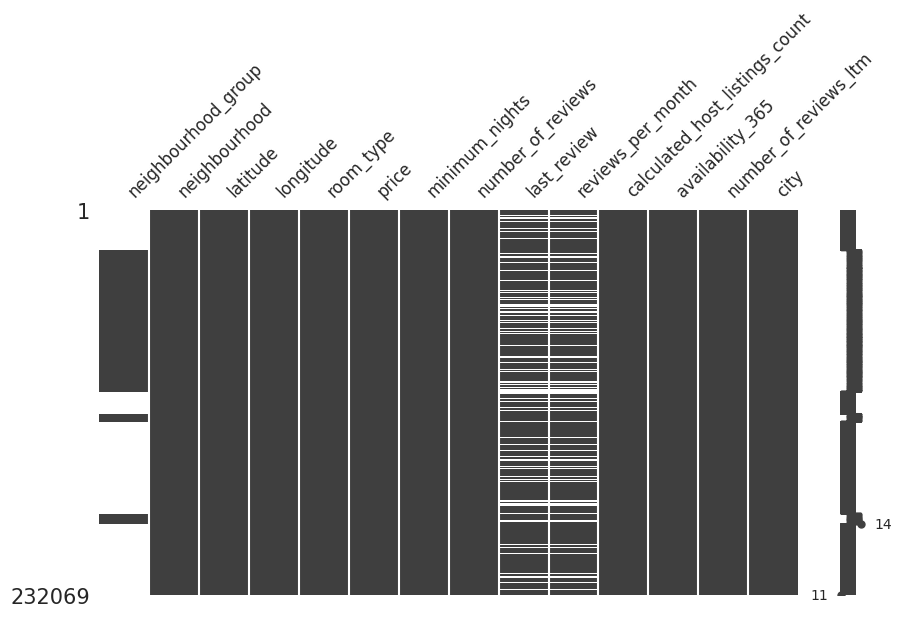

In [11]:
import missingno as msno

msno.matrix(df_vis, figsize=(10, 5), fontsize=12)

In [12]:
# plot scatter plot between all pairs of variables
# sns.pairplot(df_vis, diag_kind="kde")


In [ ]:
df_vis["room_type"] = df_vis["room_type"].map(
    {"Private room": 0, "Entire home/apt": 1, "Shared room": 2, "Hotel room": 3}
)

In [13]:

sns.kdeplot(data=df_vis, x="price", y="room_type", fill=True)